In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

X, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
X=X-np.mean(X,axis=0)
print(X.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [2]:
cov_mat=np.cov(X.T)
eigen_values,eigen_vectors=np.linalg.eig(cov_mat)
eigen_vectors=eigen_vectors[:,0:2]
X_con=X@eigen_vectors

In [3]:
def diffren_f(Z):
    A=X@Z@Z.T-X
    B=Z@Z.T@X.T+(-X).T
    Ans=(X.T@A@Z)/np.linalg.norm(A)-(B@X@Z)/np.linalg.norm(B)
    return Ans

In [4]:
d=X.shape[1]
w=np.random.rand(d,2)
w,_,_=np.linalg.svd(w)
w=w[:,:2]
q=100
learning_rate=1e-5
print(w.shape)
while q>0:
    q-=1
    wcon=w+learning_rate*diffren_f(w)
    err=X@w@w.T-X
    print("error=",np.linalg.norm(err))
    w=wcon

(784, 2)
error= 142189.11640919678
error= 141917.2107222773
error= 141607.75570239345
error= 141261.377844262
error= 140881.298166514
error= 140473.74075488822
error= 140047.9229790718
error= 139615.4673738757
error= 139189.21886809732
error= 138781.66200872132
error= 138403.31636171052
error= 138061.53277165096
error= 137759.97444186965
error= 137498.81471568267
error= 137275.45509036086
error= 137085.46554522726
error= 136923.48376271303
error= 136783.9179325956
error= 136661.4080190662
error= 136551.0730945468
error= 136448.60288707414
error= 136350.25328392134
error= 136252.79365605247
error= 136153.43910013424
error= 136049.7880868638
error= 135939.77691064466
error= 135821.65631942044
error= 135693.99175469283
error= 135555.685761909
error= 135406.01860654049
error= 135244.7005510163
error= 135071.9265790683
error= 134888.42194369424
error= 134695.4654511532
error= 134494.8777615973
error= 134288.96497984816
error= 134080.41372169685
error= 133872.1420817064
error= 133667.1198807

/home/agarwal98/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


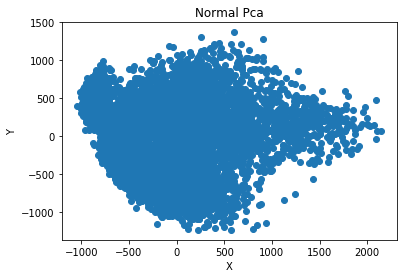

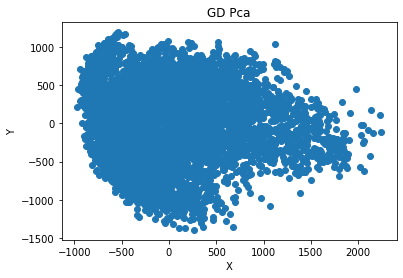

In [5]:
plt.scatter(X_con[:,0:1],X_con[:,1:2])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Normal Pca')
plt.show()
X1_con=X@w
plt.scatter(-X1_con[:,0:1],X1_con[:,1:2])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('GD Pca')
plt.show()